In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

In [21]:
x = torch.tensor([1.0], requires_grad=True)
optimizer = optim.SGD([x], lr=0.01)
y = (x - 3) ** 2

In [22]:
optimizer.zero_grad()
y.backward()

In [295]:
optimizer.step()
x.grad
x

tensor([11.9200], requires_grad=True)

In [296]:
it = 0
while it < 1000:
    loss = (x - 3) ** 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if it % 20 == 0:
        print('Iteration: %d, x: %f, loss: %f' % (it, x.item(), loss.item()))
    it += 1

Iteration: 0, x: 11.741590, loss: 79.566216
Iteration: 20, x: 8.835953, loss: 35.462673
Iteration: 40, x: 6.896129, loss: 15.805723
Iteration: 60, x: 5.601087, loss: 7.044621
Iteration: 80, x: 4.736506, loss: 3.139791
Iteration: 100, x: 4.159306, loss: 1.399407
Iteration: 120, x: 3.773962, loss: 0.623717
Iteration: 140, x: 3.516704, loss: 0.277991
Iteration: 160, x: 3.344956, loss: 0.123901
Iteration: 180, x: 3.230295, loss: 0.055222
Iteration: 200, x: 3.153747, loss: 0.024613
Iteration: 220, x: 3.102643, loss: 0.010970
Iteration: 240, x: 3.068526, loss: 0.004889
Iteration: 260, x: 3.045748, loss: 0.002179
Iteration: 280, x: 3.030541, loss: 0.000971
Iteration: 300, x: 3.020390, loss: 0.000433
Iteration: 320, x: 3.013613, loss: 0.000193
Iteration: 340, x: 3.009088, loss: 0.000086
Iteration: 360, x: 3.006067, loss: 0.000038
Iteration: 380, x: 3.004050, loss: 0.000017
Iteration: 400, x: 3.002704, loss: 0.000008
Iteration: 420, x: 3.001805, loss: 0.000003
Iteration: 440, x: 3.001206, loss:

In [640]:
x = torch.tensor([1.0], requires_grad=True)
exp = 0
niter = 10
it = 0
fact = 1
while it < niter:
    exp += x ** it / fact
    it += 1
    fact *= it

In [629]:
optimizer.step()
x.grad
x

tensor([-3.7842], requires_grad=True)

In [641]:
# Define the variables x1 and x2, setting requires_grad to True to track gradients
x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([0.0], requires_grad=True)

# Define the optimizer, which will update x1 and x2
optimizer = optim.SGD([x1, x2], lr=0.01)

# Define the loss function
def loss_fn(x1, x2):
    term1 = torch.exp(-torch.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    term2 = x1 * torch.cos(x2) + x2 * torch.sin(x1) - 0.5
    # The loss is the sum of the squares of the discrepancies
    return term1**2 + term2**2

# Optimization loop
for _ in range(1000):  # You may need to adjust the number of iterations
    optimizer.zero_grad()  # Zero the gradients
    loss = loss_fn(x1, x2)  # Compute the loss
    loss.backward()  # Compute the gradients
    optimizer.step()  # Update x1 and x2

    # Optional: print the current loss and variables
    # print(f"Loss: {loss.item()}, x1: {x1.item()}, x2: {x2.item()}")

# After the loop, x1 and x2 should be close to the solution of the system of equations
print(f"Solved for x1: {x1.item()}, x2: {x2.item()}")

Solved for x1: 0.35324737429618835, x2: 0.6060794591903687


In [ ]:
import torch.nn as nn

class LinearLeastSquare(nn.Module):
    def __init__(self, input_size):
        super(LinearLeastSquare, self).__init__()

        # Declaring neural networks building blocks. Here we only need
        # a linear transform.
        self.linear = ...

    def forward(self, input):
        # Implementing forward pass. Return corresponding output for
        # this neural network.
        return ...

In [636]:
import math
p = 512
N = 50000
X = torch.randn(N, p)
beta = torch.randn(p, 1) / math.sqrt(p)
y = torch.mm(X, beta) + 0.5 * torch.randn(N, 1)

In [639]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X, y)
dataset

## Solving equations with Pytorch

Suppose we want to solve the following system of two equations
$$
e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)
$$
$$
x_1 \cos(x_2) + x_2 \sin(x_1) = 1/2
$$

Find a loss function whose optimization leads to a solution of the system of equations above.

In [869]:
def f(x1, x2):
    term1 = torch.exp(-torch.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    term2 = x1 * torch.cos(x2) + x2 * torch.sin(x1) - 0.5
    return term1**2 + term2**2
x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([0.0], requires_grad=True)

optimizer = optim.SGD([x1, x2], lr=0.01)
optimizer.zero_grad()
loss = f(x1, x2)
loss.backward()


In [870]:
for it in range(1000):
    optimizer.zero_grad()
    loss = f(x1, x2)
    loss.backward()
    optimizer.step()
    if it % 20 == 0:
        print(f"It:{it},Loss: {loss.item()}, x1: {x1.item()}, x2: {x2.item()}")

It:0,Loss: 0.3853352963924408, x1: 0.007293293718248606, x2: 0.004650882910937071
It:20,Loss: 0.25001174211502075, x1: 0.1342378854751587, x2: 0.10766433924436569
It:40,Loss: 0.1464388072490692, x1: 0.22907374799251556, x2: 0.21434098482131958
It:60,Loss: 0.0783180370926857, x1: 0.294769823551178, x2: 0.30902358889579773
It:80,Loss: 0.040019694715738297, x1: 0.3352186679840088, x2: 0.38496679067611694
It:100,Loss: 0.020582422614097595, x1: 0.356608122587204, x2: 0.4422697126865387
It:120,Loss: 0.010968425311148167, x1: 0.36571550369262695, x2: 0.4843267500400543
It:140,Loss: 0.00605985801666975, x1: 0.36803963780403137, x2: 0.5150400996208191
It:160,Loss: 0.003429438453167677, x1: 0.3671792149543762, x2: 0.5376095771789551
It:180,Loss: 0.001966051058843732, x1: 0.36514124274253845, x2: 0.5543504357337952
It:200,Loss: 0.0011342000216245651, x1: 0.36290302872657776, x2: 0.566874086856842
It:220,Loss: 0.000656276592053473, x1: 0.3608720898628235, x2: 0.5763034224510193
It:240,Loss: 0.0003

In [873]:
import torch.nn as nn

class LinearLeastSquare(nn.Module):
    def __init__(self, input_size=1): # 这个是类的构造函数
        super(LinearLeastSquare, self).__init__() # 调用父类的构造函数
        self.linear = nn.Linear(input_size, 1) # 定义一个线性层
    def forward(self, input):
        return self.linear(input) # 返回线性层的输出

## Synthetic data

We use the following linear model:

$$
y = \langle\beta,x\rangle+\varepsilon
$$

where $$(x\in\mathcal R^p)$$ and $$(\varepsilon\sim\mathcal N(0, \sigma^2))$$

In [907]:
p = 512
N = 50000
X = torch.randn(N, p)
beta = torch.randn(p, 1) / math.sqrt(p)
y =  torch.mm(X, beta) +  0.5 * torch.randn(N, 1)

In [908]:
from torch.utils.data import TensorDataset, DataLoader
batch_size = 128
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
loss_fn = torch.nn.MSELoss(reduction='mean')
model = LinearLeastSquare(p)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=.9)

In [909]:
losses = []
epochs = 10
for i in range(epochs):
    for x_batch, y_batch in train_loader:
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f"Epoch: {i}, Loss: {loss.item()}")

Epoch: 0, Loss: 0.3109176456928253
Epoch: 1, Loss: 0.4207448959350586
Epoch: 2, Loss: 0.40231746435165405
Epoch: 3, Loss: 0.34594258666038513
Epoch: 4, Loss: 0.47083789110183716
Epoch: 5, Loss: 0.40720129013061523
Epoch: 6, Loss: 0.3796127140522003
Epoch: 7, Loss: 0.5400133728981018
Epoch: 8, Loss: 0.4514983594417572
Epoch: 9, Loss: 0.30225104093551636


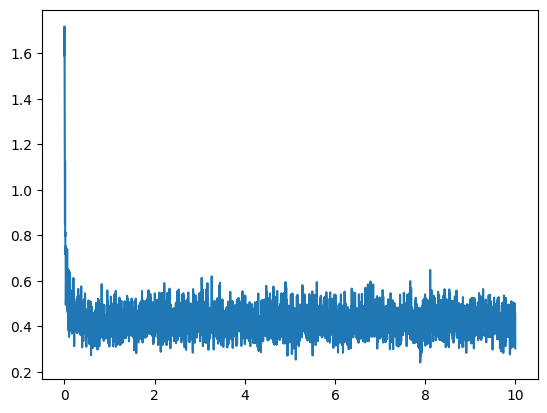

In [910]:
x = np.arange(len(losses)) / len(losses) * epochs
plt.plot(x, losses)

In [911]:
model.linear.weight

Parameter containing:
tensor([[-0.0295,  0.0049, -0.1062, -0.0292, -0.0026, -0.0493, -0.0176, -0.0494,
         -0.1145, -0.0234,  0.0551, -0.0032, -0.0088,  0.0627, -0.0191, -0.0412,
          0.0135,  0.0308, -0.0143,  0.0278,  0.0002, -0.0502, -0.0476, -0.0350,
          0.0178,  0.0600, -0.0705,  0.0422,  0.0361,  0.0548, -0.0379, -0.0793,
         -0.0087,  0.0093, -0.0992,  0.0455,  0.0282, -0.0261,  0.0348,  0.0718,
          0.1028,  0.0147, -0.0509,  0.0122, -0.0633,  0.0486, -0.0474,  0.0931,
         -0.0139, -0.0080,  0.0327, -0.0425, -0.0217,  0.1342,  0.0142,  0.0048,
          0.0252, -0.0393,  0.0127,  0.0470,  0.0324, -0.1016,  0.0105,  0.0327,
         -0.0629, -0.0765, -0.0037, -0.0211,  0.0160, -0.0226, -0.0338, -0.0773,
          0.0028,  0.0304, -0.0151,  0.0141, -0.0371,  0.0760, -0.0199, -0.0347,
         -0.0764, -0.0537,  0.0237,  0.0446,  0.0221, -0.0783, -0.1417, -0.0339,
          0.0042,  0.0454,  0.0040, -0.0123, -0.0131,  0.0528, -0.0618,  0.0135,
      

In [912]:
beta

tensor([[-6.0938e-02],
        [ 1.9692e-02],
        [-6.7292e-02],
        [-3.7000e-03],
        [ 1.4188e-02],
        [-3.9201e-02],
        [-8.4591e-03],
        [-3.4809e-02],
        [-7.7197e-02],
        [ 1.6108e-03],
        [ 7.7684e-02],
        [-1.7489e-02],
        [ 2.2117e-02],
        [ 5.8796e-02],
        [ 3.5464e-03],
        [-2.9365e-02],
        [ 7.9470e-03],
        [ 5.2896e-02],
        [-7.0590e-03],
        [ 1.9003e-02],
        [-1.1104e-03],
        [-2.6583e-02],
        [-4.6769e-02],
        [-4.7021e-02],
        [ 2.6686e-03],
        [ 6.8140e-02],
        [-6.3855e-02],
        [ 3.6165e-02],
        [ 3.8982e-02],
        [ 2.6727e-02],
        [-5.6703e-02],
        [-6.7984e-02],
        [ 2.7942e-03],
        [ 1.5570e-02],
        [-7.5195e-02],
        [ 3.7269e-02],
        [ 3.4714e-02],
        [-2.4200e-02],
        [ 3.7095e-02],
        [ 7.6533e-02],
        [ 7.7231e-02],
        [ 2.9814e-02],
        [-5.8169e-02],
        [ 2

In [913]:
from torch.optim.lr_scheduler import MultiStepLR
from torch.optim import SGD
model = LinearLeastSquare(p)
optimizer = SGD(model.parameters(), lr=0.01, momentum=.9)
scheduler = MultiStepLR(optimizer, milestones=[3, 6], gamma=0.2)

Epoch 0/10: Last loss: 0.39981526136398315
Epoch 1/10: Last loss: 0.44673973321914673
Epoch 2/10: Last loss: 0.34097543358802795
Epoch 3/10: Last loss: 0.25742512941360474
Epoch 4/10: Last loss: 0.30409204959869385
Epoch 5/10: Last loss: 0.25534766912460327
Epoch 6/10: Last loss: 0.22398512065410614
Epoch 7/10: Last loss: 0.20314249396324158
Epoch 8/10: Last loss: 0.19817712903022766
Epoch 9/10: Last loss: 0.2738526463508606


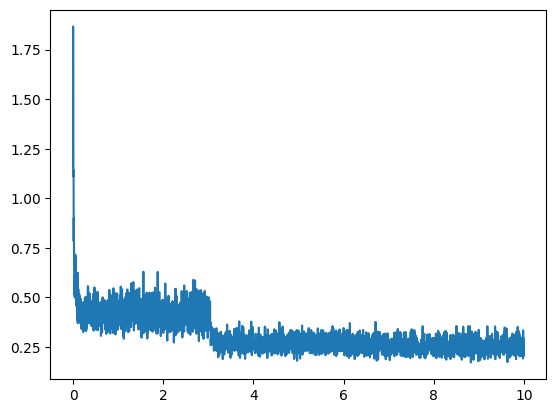

In [914]:
epochs = 10
losses = []
for i in range(epochs):
    for src, tgt in train_loader:
        # Forward pass
        prd = model(src)

        # Backpropagation on loss
        loss = loss_fn(prd, tgt)
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent step
        optimizer.step()

        losses.append(loss.item())

    # Scheduler step
    scheduler.step()

    print(f"Epoch {i}/{epochs}: Last loss: {loss}")

x = np.arange(len(losses)) / len(losses) * epochs
plt.plot(x, losses)

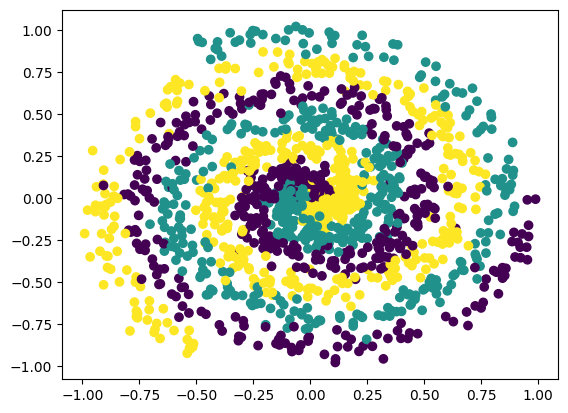

In [915]:
n_classes = 3
n_loops = 2
n_samples = 1500

def spirals(n_classes=3, n_samples=1500, n_loops=2):
    klass = np.random.choice(n_classes, n_samples)
    radius = np.random.rand(n_samples)
    theta = klass * 2 * math.pi / n_classes + radius * 2 * math.pi * n_loops
    radius = radius + 0.05 * np.random.randn(n_samples)
    return np.column_stack((radius * np.cos(theta), radius * np.sin(theta))).astype("float32"), klass

X_, y_ = spirals(n_samples=n_samples, n_classes=n_classes, n_loops=n_loops)
plt.scatter(X_[:, 0], X_[:, 1], c=y_)

In [917]:
y_

array([0, 2, 0, ..., 0, 1, 1])